# General testing

In [1]:
import mpcorbfile

In [2]:
# Class to drive
f = mpcorbfile.mpcorb_file()

In [3]:
"""
CALCULATE DATES FROM COMPRESSED EPOCH
Examples:

        1996 Jan. 1    = J9611
        1996 Jan. 10   = J961A
        1996 Sept.30   = J969U
        1996 Oct. 1    = J96A1
        2001 Oct. 22   = K01AM

        This system can be extended to dates with non-integral days. The decimal fraction of the day is simply appended to the five characters defined above.

        Examples:

        1998 Jan. 18.73     = J981I73
        2001 Oct. 22.138303 = K01AM138303
"""
for p in ["J9611", "J961A", "J969U", "J96A1", "K01AM"]:
    print(p, f.compressed_epoch_to_datetime(p))

J9611 1996-01-01 00:00:00
J961A 1996-01-10 00:00:00
J969U 1996-09-30 00:00:00
J96A1 1996-10-01 00:00:00
K01AM 2001-10-22 00:00:00


In [4]:
# load MPCORB.DAT
bodies = f.read("MPCORB_TEST.DAT")
# bodies = f.read("MPCORB.DAT")
f.colnames

reading: 100%|██████████| 13.2k/13.2k [00:00<00:00, 134k bodies/s]


['packed_designation',
 'H',
 'G',
 'Epoch',
 'M',
 'Peri',
 'Node',
 'i',
 'e',
 'n',
 'a',
 'U',
 'Ref',
 'Num_obs',
 'Num_opps',
 'Arc_length',
 'rms',
 'Perturbers',
 'Perturbers_2',
 'Computer',
 'Hex_flags',
 'Number',
 'Name',
 'Last_obs',
 'epochJD',
 'designation',
 'discover_date',
 'orbit_type']

In [5]:
bodies[0]

{'packed_designation': 'a7943',
 'H': 24.19,
 'G': 0.15,
 'Epoch': datetime.datetime(2025, 5, 5, 0, 0),
 'M': 184.7538,
 'Peri': 195.63684,
 'Node': 146.91033,
 'i': 11.6102,
 'e': 0.0894684,
 'n': 1.13494811,
 'a': 0.9102319,
 'U': '2',
 'Ref': 'E2024-JU2',
 'Num_obs': 1055,
 'Num_opps': 2,
 'Arc_length': '2012-2013',
 'rms': 0.36,
 'Perturbers': 'M-v',
 'Perturbers_2': '3Ek',
 'Computer': 'Veres',
 'Hex_flags': 2049,
 'Number': '(367943)',
 'Name': 'Duende',
 'Last_obs': '20130221',
 'epochJD': 2460800.5,
 'designation': '367943',
 'discover_date': nan,
 'orbit_type': 'NEO;Athen'}

In [6]:
# Write new file
f.write("new_mcorb.dat")

writting: 100%|██████████| 13.2k/13.2k [00:00<00:00, 65.2k bodies/s]


True

In [7]:
import pandas as pd

df=pd.DataFrame(bodies)
df.head()

,packed_designation,H,G,Epoch,M,Peri,Node,i,e,n,...,Perturbers_2,Computer,Hex_flags,Number,Name,Last_obs,epochJD,designation,discover_date,orbit_type
0,a7943,24.19,0.15,2025-05-05,184.75380,195.63684,146.91033,11.61020,0.089468,1.134948,...,3Ek,Veres,2049,(367943),Duende,20130221,2460800.5,367943,NaN,NEO;Athen
1,00001,3.34,0.15,2025-05-05,188.70269,73.27343,80.25221,10.58780,0.079401,0.214247,...,30k,MPCLINUX,16384,(1),Ceres,20241101,2460800.5,1,NaN,MB II
2,00002,4.11,0.15,2025-05-05,168.79870,310.91037,172.89530,34.92402,0.230540,0.213766,...,28k,Pan,16384,(2),Pallas,20240927,2460800.5,2,NaN,MB II
3,00003,5.18,0.15,2025-05-05,172.45499,247.85972,169.82994,12.98651,0.255947,0.225826,...,3Ek,Pan,16384,(3),Juno,20240607,2460800.5,3,NaN,MB II
4,00004,3.25,0.15,2025-05-05,332.45069,151.58335,103.70297,7.14394,0.090107,0.271613,...,18k,Pan,16384,(4),Vesta,20240306,2460800.5,4,NaN,MB I


<Axes: >

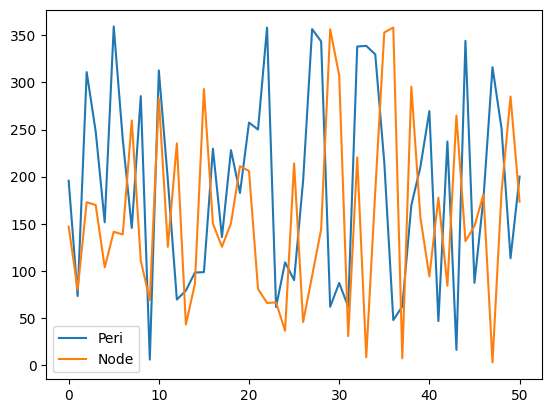

In [8]:
#Some plot to be used as a cover in documentation
df.loc[0:50,['packed_designation','Peri','Node']].plot()

## Test json support

In [9]:
f.write_json("mpcorb.json")

In [10]:
for c in f.get_chunks(13):
    c

In [11]:
# bodies1=f.read_json('mpcorb_extended.json')
bodies1 = f.read_json("mpcorb_extended_test.json")
bodies1[0]

100%|██████████| 7/7 [00:00<00:00, 157006.03it/s]


{'Critical_list_numbered_object_flag': 1,
 'H': 3.34,
 'G': 0.15,
 'Num_obs': 7330,
 'rms': 0.8,
 'U': '0',
 'Arc_years': '1801-2024',
 'Perturbers': 'M-v',
 'Perturbers_2': '30k',
 'Number': '(1)',
 'Name': 'Ceres',
 'Principal_desig': 'A801 AA',
 'Other_desigs': ['A899 OF', '1943 XB'],
 'Epoch': datetime.date(2025, 5, 5),
 'M': 188.70269,
 'Peri': 73.27343,
 'Node': 80.25221,
 'i': 10.5878,
 'e': 0.0794013,
 'n': 0.21424651,
 'a': 2.7660512,
 'Ref': 'E2024-V47',
 'Num_opps': 125,
 'Computer': 'MPCLINUX',
 'Hex_flags': 16384,
 'Last_obs': '20241101',
 'Tp': 2461600.03376,
 'Orbital_period': 4.6003441,
 'Perihelion_dist': 2.5464231,
 'Aphelion_dist': 2.9856793,
 'Semilatus_rectum': 1.3743062,
 'Synodic_period': 1.2777512,
 'Orbit_type': 'MBA',
 'packed_designation': '00001',
 'Arc_length': '1801-2024'}

In [12]:
f.write("new_mpcorb1.dat")

writting: 100%|██████████| 7.00/7.00 [00:00<00:00, 40.3k bodies/s]


True

In [13]:
f.write_json("mpcorb1.json")

In [14]:
for b in f.bodies:
    print(f.datetime_compressed_epoch(b["Epoch"]))

K2555
K2555
K2555
K2555
K2555
K2555
K2555


In [15]:
for d in [
    "1995 XA",
    "1995 XL1",
    "1995 FB13",
    "1998 SQ108",
    "1998 SV127",
    "2099 AZ193",
    "2007 TA418",
    "(98)",
    "(100345)",
    "(360017)",
    "(203289)",
]:
    print(d, "\t", f.pack_designation(d))

1995 XA 	 J95X00A
1995 XL1 	 J95X01L
1995 FB13 	 J95F13B
1998 SQ108 	 J98SA8Q
1998 SV127 	 J98SC7V
2099 AZ193 	 K99AJ3Z
2007 TA418 	 K07Tf8A
(98) 	 00098
(100345) 	 A0345
(360017) 	 a0017
(203289) 	 K3289


In [16]:
for d in ["(3140113)", "(15396335)", "(620061)", "(620000)"]:
    print(d, f.pack_designation(d))

(3140113) ~AZaz
(15396335) ~zzzz
(620061) ~000z
(620000) ~0000


## Create new files from scratch

In [17]:
import datetime

mpc = mpcorbfile.mpcorb_file()
Name = "2026 AA1"
epoch = datetime.datetime(2026, 1, 1)
packed_designation = mpc.pack_designation(Name)
body = {
    "packed_designation": packed_designation,
    "H": 3.2,
    "G": 0.15,
    "Epoch": epoch,
    "M": 0.0,
    "Peri": 0.0,
    "Node": 0.0,
    "i": 0.0,
    "e": 0.0,
    "n": 0.0,
    "a": 0.0,
    "U": 0.0,
    "Ref": "MPC 12345",
    "Num": 12345,
    "Name": "Test",
}
mpc.add(body)
mpc.write("test.dat")

writting: 100%|██████████| 1.00/1.00 [00:00<00:00, 16.4k bodies/s]


True